# Аналитика в авиакомпании

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Данные в таблице `d1`:  
`model` - модель самолета  
`flights_amount` - количество рейсов для каждой модели самолетов `model` в сентябре 2018 года

In [2]:
d1 = pd.read_csv('datasets/query_1.csv')

In [3]:
d1.head(8)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Пропусков нет, типы данных адекватны.

Данные в таблице `d2`:  
`city` - город
`average_flights` - среднее количество рейсов, прибывающих в город `city` за день в августе 2018 года.  

In [5]:
d2 = pd.read_csv('datasets/query_3.csv')

In [6]:
d2.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [7]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Пропусков нет, типы данных адекватны.

Выберем топ-10 городов по количеству рейсов:

In [8]:
top10 = d2.sort_values('average_flights', ascending=False).head(10)
top10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


В Москву в августе 2018 года прилетело в среднем в 4 раза больше пассажиров, чем во второй по посещаемости город - Санкт-Петербург. В Новосибирск, занимающий третье по посещаемости в августе место, прилетают вдвое меньше чем в Санкт-Петербург, далее разница между городами становится менее существенной.  

Визуализируем количетсво рейсов по городам:

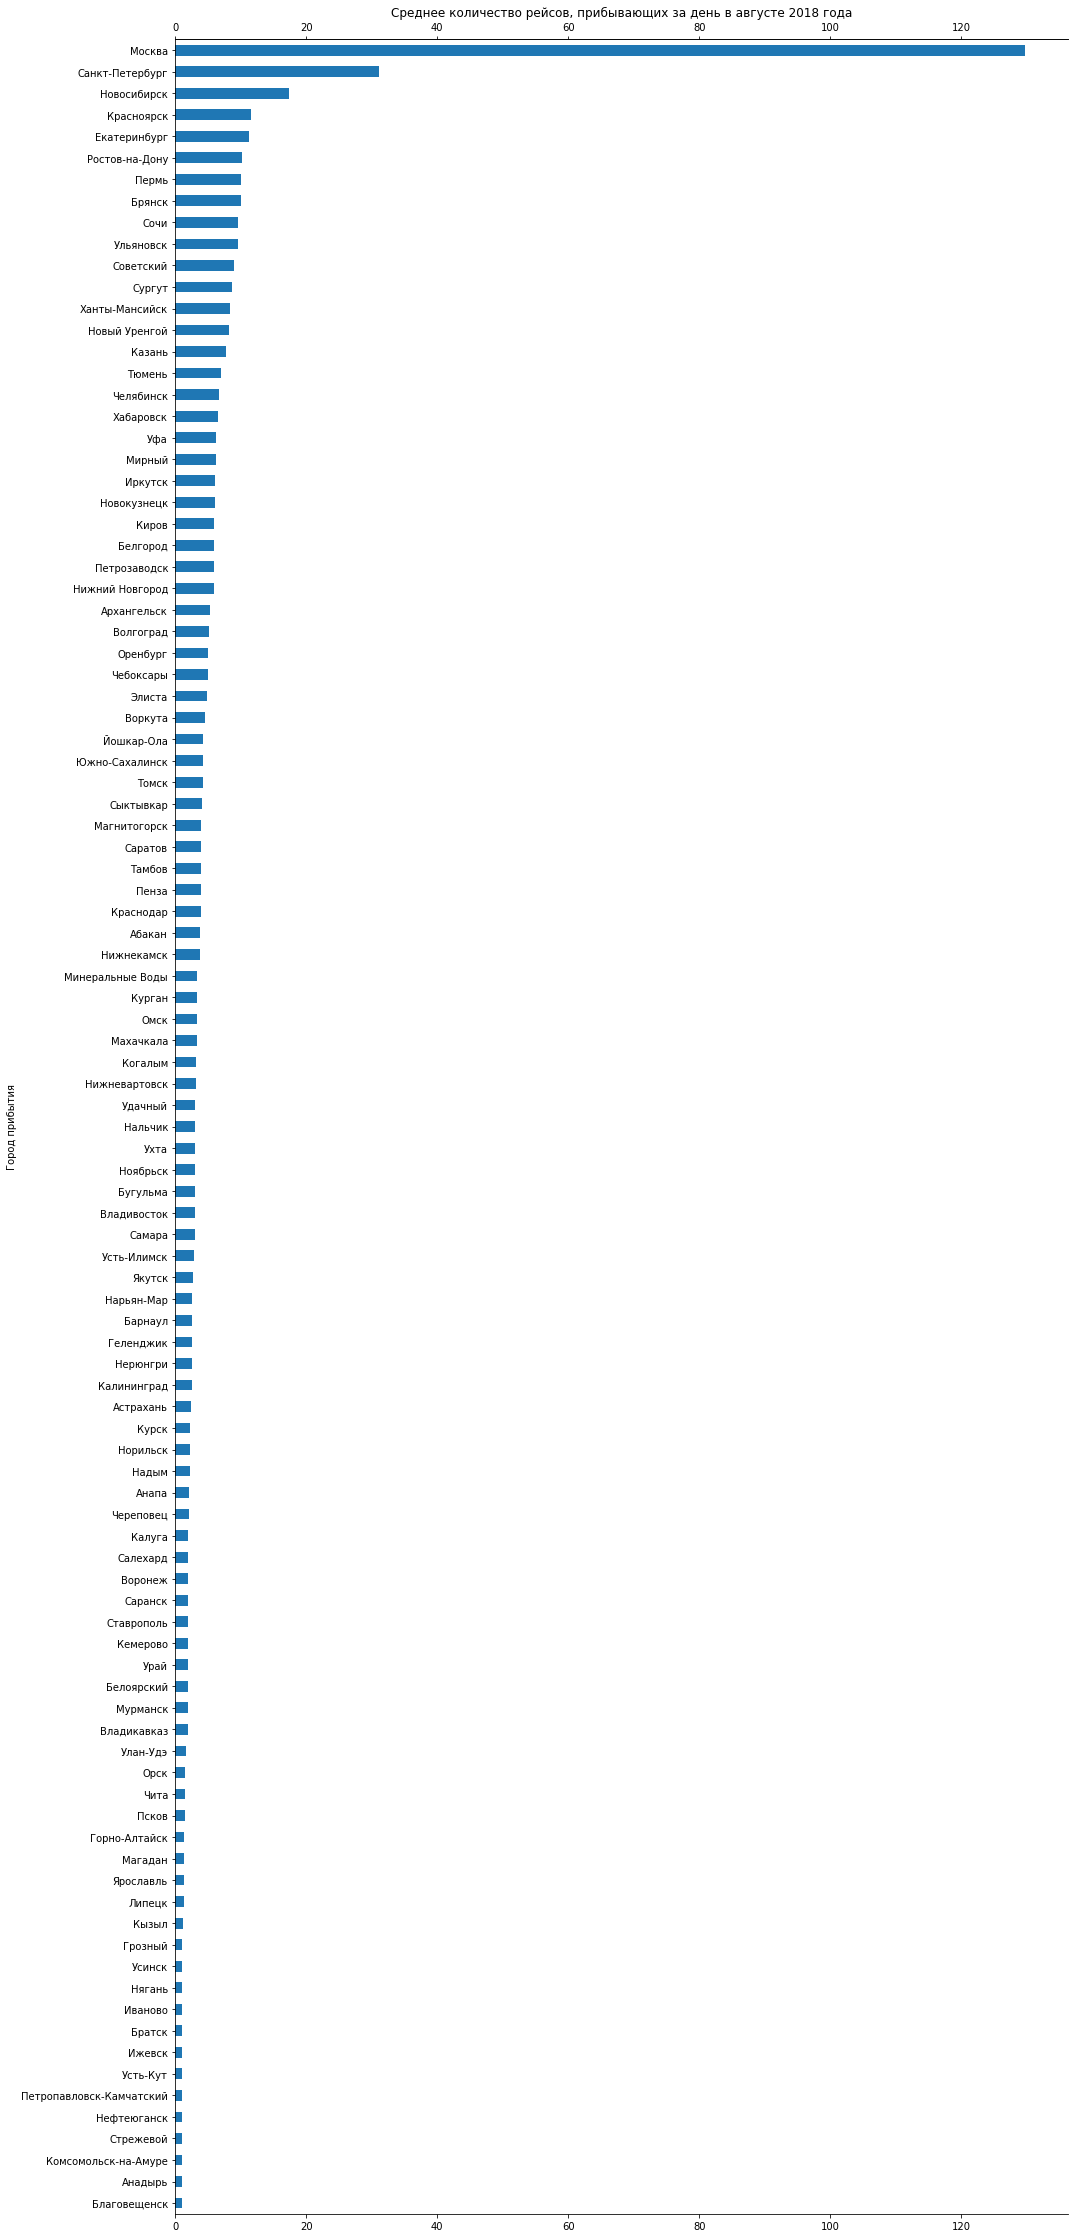

In [9]:
d2 = d2.sort_values('average_flights') #для наглядности отсортируем значения
ax = d2.plot(x='city', y='average_flights', kind='barh', figsize=(16,40), legend=False,
       title='Среднее количество рейсов, прибывающих за день в августе 2018 года')
plt.gca().spines['right'].set_visible(False)
ax.secondary_xaxis('top')
ax.set_ylabel('Город прибытия');

График для топ-10 городов:

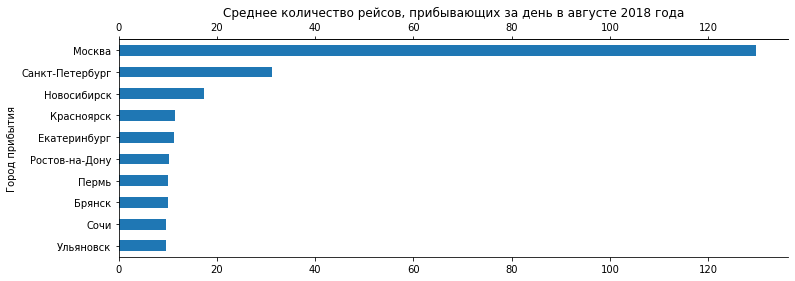

In [10]:
ax1=top10.sort_values('average_flights').plot(x='city', y='average_flights', kind='barh', figsize=(12,4), legend=False,
       title='Среднее количество рейсов, прибывающих за день в августе 2018 года')
plt.gca().spines['right'].set_visible(False)
ax1.secondary_xaxis('top')
ax1.set_ylabel('Город прибытия');

Москва набирает максимальное число пассажиров, так как является столицей и крупнейшим хабом для совершения перелетов внутри страны и полетов зарубеж. Далее идут крупнейшие экономические центры страны.

Построим график количества рейсов, выполненных самолетами определенной модели в сентябре 2018 года.

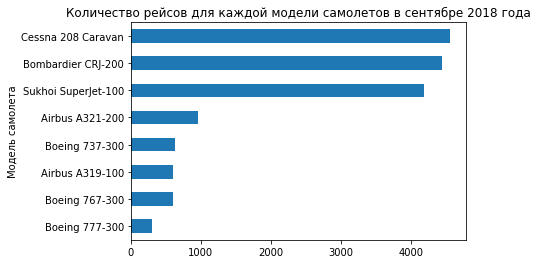

In [11]:
ax2 = d1.sort_values('flights_amount').plot(x='model', y='flights_amount', kind='barh',
                                     legend=False, title='Количество рейсов для каждой\
 модели самолетов в сентябре 2018 года')
ax2.set_ylabel('Модель самолета');

Больше всего рейсов совершают небольшие самолеты, предназначенные для перевозки пассажиров на расстояния малой и средней дальности. Меньше всего летают дальнемагистральные самолеты большой вместительности, такие как Boeing 767-300 и Boeing 777-300.